In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from collections import OrderedDict

# Daten laden:

values = np.loadtxt('winequality_white.csv', dtype=np.float32, delimiter=";",
skiprows=1)

t_u = values[1:100, 0:11].astype(np.float32)  # INPUT
t_c = values[1:100, 11].astype(np.float32)    # OUTPUT
t_u = torch.tensor(t_u).unsqueeze(1)
t_c = torch.tensor(t_c).unsqueeze(1)


n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

import time

def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    
    start_time = time.time()  # Startzeitpunkt des Trainings

    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")
 
            
    end_time = time.time()  # Endzeitpunkt des Trainings
    duration = end_time - start_time  # Zeitdauer berechnen
    print(f"Dauer des Trainings: {duration:.2f} seconds")


# Modell definieren:

neuron_count = 1000  
output_size = 1
input_size = 11  

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(input_size, neuron_count)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(neuron_count, output_size))
]))

# Training durchführen:

optimizer = optim.SGD(seq_model.parameters(), lr=1e-6)




training_loop(
    n_epochs = 5000, 
    optimizer = optimizer, 
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)



FileNotFoundError: winequality_white.csv not found.

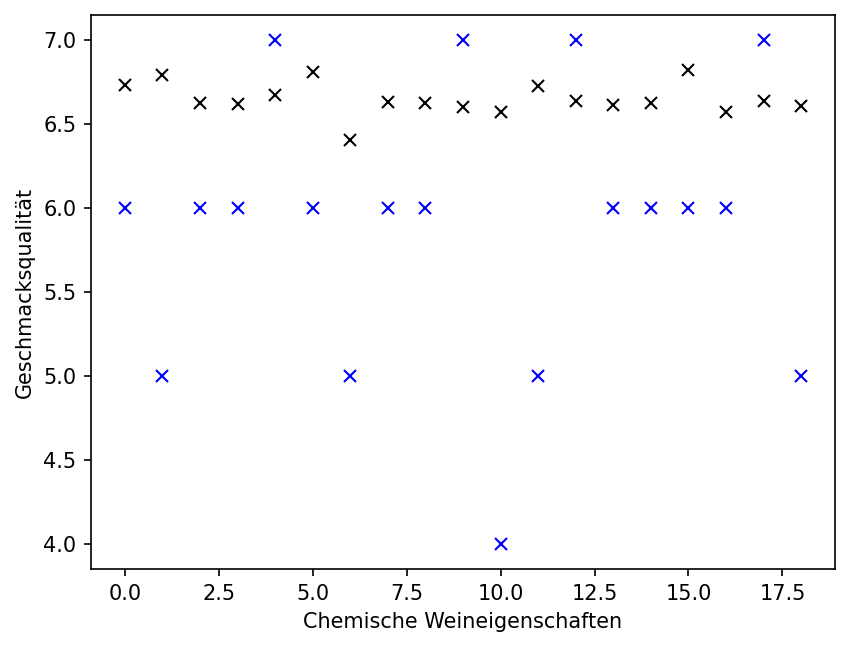

In [ ]:

t_range = torch.arange(20., 90., step=5).unsqueeze(1)

results = seq_model(t_u_val)
fig = plt.figure(dpi=150)
plt.xlabel("Chemische Weineigenschaften")
plt.ylabel("Geschmacksqualität")
plt.plot(results[:,0,0].detach().numpy(), 'kx') 
plt.plot(t_c_val[:,0].detach().numpy(), 'bx') 
